First 5 rows of the dataset:
      brand                            model  model_year    milage  \
0      Ford  Utility Police Interceptor Base        2013   51000.0   
1  INFINITI                 Q50 Hybrid Sport        2015   88900.0   
2      Audi             S3 2.0T Premium Plus        2017   84000.0   
3       BMW                           740 iL        2001  242000.0   
4     Lexus                   RC 350 F Sport        2021   23436.0   

       fuel_type transmission    price  engine_hp  engine_L engine_type  
0  E85 Flex Fuel  6-Speed A/T  10300.0      300.0       3.7          V6  
1         Hybrid  7-Speed A/T  15500.0      354.0       3.5          V6  
2       Gasoline  6-Speed A/T  31000.0      292.0       2.0       OTHER  
3       Gasoline          A/T   7300.0      282.0       4.4       OTHER  
4       Gasoline  6-Speed A/T  41927.0      311.0       3.5          V6  

Sumary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 10 

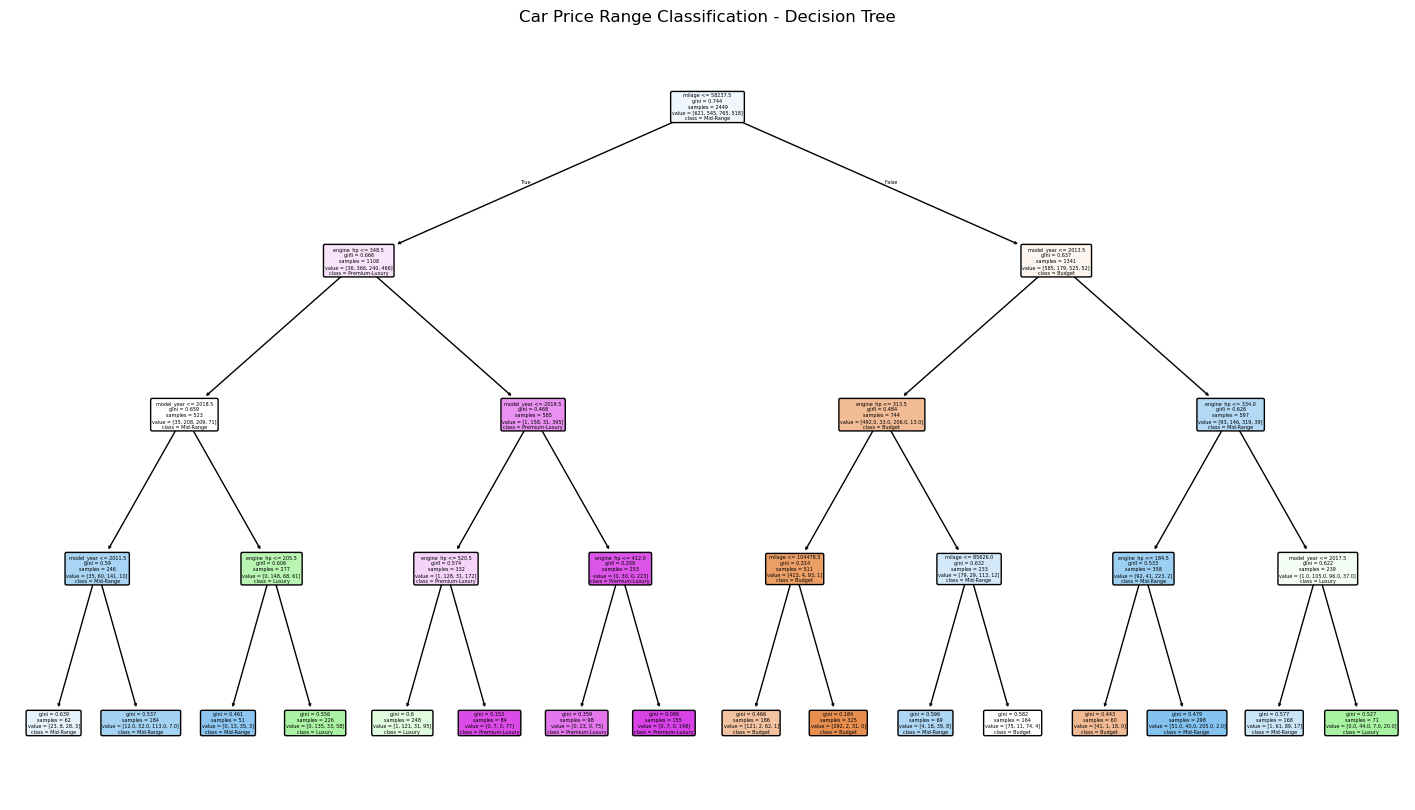


Classification Report:
                 precision    recall  f1-score   support

        Budget       0.70      0.84      0.77       157
        Luxury       0.57      0.57      0.57       148
     Mid-Range       0.56      0.60      0.58       184
Premium-Luxury       0.84      0.56      0.68       124

      accuracy                           0.65       613
     macro avg       0.67      0.64      0.65       613
  weighted avg       0.66      0.65      0.64       613


Confusion Matrix:
 [[132   0  25   0]
 [  3  84  49  12]
 [ 52  21 110   1]
 [  1  42  11  70]]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

file_path = "/Users/anirudhravipudi/Desktop/AI/Practice/cleaned_used_cars.csv"
df = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(df.head())
print("\nSumary:")
print(df.info())

df['price_range'] = pd.cut(
    df['price'], 
    bins=[0, 15000, 30000, 50000, np.inf],
    labels=['Budget', 'Mid-Range', 'Luxury', 'Premium-Luxury']
)
df.drop('price', axis=1, inplace=True)

label_cols = ['brand', 'model', 'fuel_type', 'transmission', 'engine_type']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(18, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Car Price Range Classification - Decision Tree")
plt.show()

y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    

In [15]:
from sklearn.model_selection import cross_val_score

for d in range(2, 11):
    tree = DecisionTreeClassifier(max_depth=d)
    score = cross_val_score(tree, X, y, cv=5).mean()
    print(f"Depth {d}: {score:.3f}")

Depth 2: 0.572
Depth 3: 0.622
Depth 4: 0.641
Depth 5: 0.659
Depth 6: 0.670
Depth 7: 0.684
Depth 8: 0.681
Depth 9: 0.680
Depth 10: 0.665
